#01

In [7]:
import numpy as np
from scipy.stats import wilcoxon

In [8]:
d1 = [(20+i*5) for i in range(10)]
d2 = [10] + [(20+i*5) for i in range(9)]

In [9]:
stat, p = wilcoxon(d1, d2)

print(stat, p)

0.0 0.001953125


In [19]:
def HO(p):
    if p > 0.05:
        print("fail to recject HO")
    else :
        print("reject HO")

#02

In [12]:
import pandas as pd

pre_treat= np.random.randint(1, 10, size=20)
post_treat = np.random.randint(-3,4,size=20)

# dataframe
data = pd.DataFrame({
    "pre_treatment" : pre_treat,
    "post_treatment" : post_treat
})

print(data)
data.to_csv("./data/treatment_data.csv", index=False,encoding='utf-8')

    pre_treatment  post_treatment
0               9               0
1               7               0
2               5              -2
3               7               3
4               3               2
5               6              -1
6               4               3
7               4               0
8               5               0
9               8               0
10              7               2
11              8              -1
12              2               1
13              8              -3
14              9               1
15              3               3
16              6               2
17              2              -3
18              1              -3
19              6              -1


In [14]:
tr_d = pd.read_csv("./data/treatment_data.csv")

stat, p = wilcoxon(tr_d["pre_treatment"], tr_d["post_treatment"])

c:\Users\acens\miniconda3\envs\AI\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [15]:
if p > 0.05:
    print("fail to recject HO")
else :
    print("reject HO")

reject HO


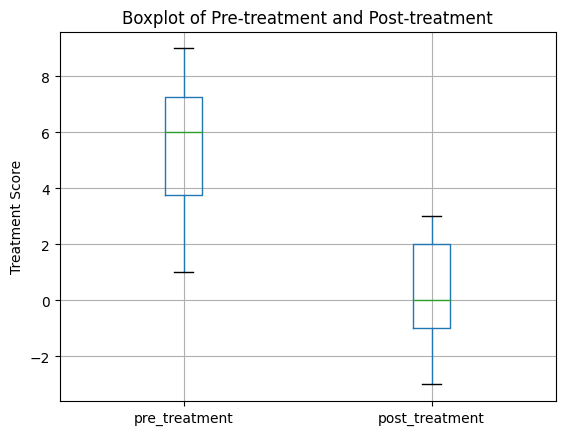

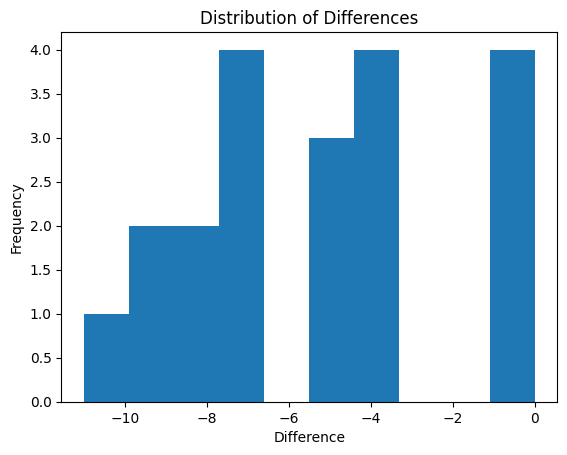

In [17]:
import matplotlib.pyplot as plt
# boxplot 그리기
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()

# 두 변수의 차이에 대한 분포를 시각화
fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()

#03

In [18]:
pre_treat = np.random.rand(20) + 1
post_treat = np.random.rand(20) + 2

data = pd.DataFrame({
    "pre_treatment" : pre_treat,
    "post_treatment" : post_treat
})

data.to_csv("./data/non_normal_data.csv", index=False, encoding="utf-8")

In [20]:
stat, p = wilcoxon(pre_treat, post_treat)

print(stat, p)

HO(p)

0.0 1.9073486328125e-06
reject HO


In [21]:
#04

In [22]:
#data?

In [27]:
# from statsmodels.stats.multitest import multipletests

# data = pd.read_csv("./data/treatment_data1.csv")
# for i in range(10):
#     sample = data.sample(frac=0.5)
#     st, p = wilcoxon(sample["pre_treatment"], sample["post_treatment"])
#     print("Sample", i, ":")
#     print("statistic ", st)
#     print("p-val ", p)
#     HO(p)

# alpha = 0.05
# rejects_bonf, corrected_p_bonf, _, _ = multipletests(p_vals, alpha=alpha, method='bonferroni')
# print("Bonferonni")

In [31]:
from statsmodels.stats.multitest import multipletests


data = pd.read_csv("./data/treatment_data.csv")


p_values = []

for i in range(10) :
 sample = data.sample(frac=0.5)
 st, p = wilcoxon(sample['pre_treatment'], sample['post_treatment'])
 print("sample", i+1, ':')
 print('statistic : ', st)
 print('p-value', p)
 p_values.append(p)
 if p > 0.05 :
    print("fail to reject HO")
 else :
     print("reject HO")


alpha = 0.05
rejects_bonf, corrected_p_bonf, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')
print("Bonferroni")
for i in range(len(rejects_bonf)) :
     if rejects_bonf[i] :
         print(f"sample : {i+1} : reject HO" )
     else :
         print(f"sample : {i+1} : fail to reject HO")

ModuleNotFoundError: No module named 'statsmodels'

In [32]:
!pip install statsmodels

  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
